In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import h3
import geopandas as gpd
import geojson
from shapely.geometry import Point
import ast

In [29]:
df = pd.read_csv(
    "../data/analytics_trip_data.csv",
    index_col=None,
    dtype={
        'payment_type': 'category',
        'company': 'category'
    },     
    parse_dates=['trip_start_timestamp','trip_middle_timestamp','trip_end_timestamp'])

In [30]:
pd.set_option('display.max_columns', None)
df.describe()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,trip_middle_timestamp,price_per_mile,miles_per_hour,temperature,precipitation
count,14562028,14562028,1.456203e+07,1.456203e+07,1.137150e+07,1.137150e+07,1.456157e+07,1.450446e+07,1.456203e+07,1.456203e+07,11550213.0,1.456203e+07,1.456203e+07,14562028,1.456160e+07,1.456203e+07,1.456203e+07,1.456203e+07
mean,2018-06-26 19:03:04.683017984,2018-06-26 19:17:55.079018240,8.885241e+02,4.092234e+00,1.703139e+10,1.703136e+10,2.536240e+01,2.222967e+01,1.425125e+01,1.844400e+00,0.0,8.380897e-01,1.707727e+01,2018-06-26 19:10:29.881018368,1.460164e+01,1.377499e+01,1.209902e+01,2.732992e-03
min,2018-01-01 00:15:00,2018-01-01 00:15:00,6.100000e+01,1.600000e-01,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,2018-01-01 00:15:00,1.000000e-02,1.000215e+00,-2.277778e+01,0.000000e+00
25%,2018-04-01 00:30:00,2018-04-01 00:45:00,4.030000e+02,1.000000e+00,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,6.500000e+00,0.000000e+00,0.0,0.000000e+00,7.750000e+00,2018-04-01 00:37:30,7.000000e+00,8.250000e+00,2.222222e+00,0.000000e+00
50%,2018-06-20 20:30:00,2018-06-20 20:45:00,6.030000e+02,1.700000e+00,1.703128e+10,1.703128e+10,2.800000e+01,2.400000e+01,8.500000e+00,0.000000e+00,0.0,0.000000e+00,1.050000e+01,2018-06-20 20:37:30,9.000000e+00,1.109589e+01,1.055556e+01,0.000000e+00
75%,2018-09-22 21:00:00,2018-09-22 21:15:00,1.026000e+03,4.000000e+00,1.703184e+10,1.703183e+10,3.200000e+01,3.200000e+01,1.500000e+01,2.400000e+00,0.0,1.000000e+00,1.725000e+01,2018-09-22 21:07:30,1.500000e+01,1.666667e+01,2.277778e+01,0.000000e+00
max,2018-12-30 23:45:00,2018-12-31 01:30:00,7.199000e+03,4.993000e+01,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,9.250000e+03,8.000000e+02,0.0,9.832430e+03,9.871430e+03,2018-12-31 00:30:00,1.333757e+04,5.000000e+01,3.555556e+01,1.100000e+00
std,NaN,NaN,7.941427e+02,5.353668e+00,3.416295e+05,3.279729e+05,1.981870e+01,1.724037e+01,1.988032e+01,2.895430e+00,0.0,9.218098e+00,2.370150e+01,NaN,2.145791e+01,8.358539e+00,1.179423e+01,2.687785e-02


In [31]:
df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_location,dropoff_centroid_location,h3_res_4_pickup,h3_res_4_dropoff,h3_res_6_pickup,h3_res_6_dropoff,h3_res_8_pickup,h3_res_8_dropoff,h3_res_9_pickup,h3_res_9_dropoff,trip_middle_timestamp,price_per_mile,miles_per_hour,date,temperature,precipitation
0,ac1fae1544d7804f13fbf657cb058ba91a983fea,847cf962bd6f62040673e6c24c24940aeb2d7fdaa54677...,2018-01-01 00:15:00,2018-01-01 00:30:00,960.0,2.6,1.703107e+10,1.703108e+10,7.0,8.0,11.00,0.0,0.0,0.0,11.00,Cash,Taxi Affiliation Services,POINT (-87.6317173661 41.9146162864),POINT (-87.6266589003 41.90752007470001),842664dffffffff,842664dffffffff,862664c17ffffff,862664c17ffffff,882664c115fffff,882664c117fffff,892664c114fffff,892664c116fffff,2018-01-01 00:22:30,11.000000,9.750000,2018-01-01 01:53:00,-18.333333,0.0
1,31c416218f80ee2e585777bb475243b971504afc,034ec4437f304cffcd4acf850106574343e69d3c5424ac...,2018-01-01 00:15:00,2018-01-01 00:30:00,523.0,2.6,NaN,NaN,77.0,14.0,9.75,2.0,NaN,0.0,11.75,Credit Card,Flash Cab,POINT (-87.6634164054 41.9867117999),POINT (-87.7215590627 41.968069),842664dffffffff,842664dffffffff,862664d8fffffff,862664ca7ffffff,882664d88bfffff,882664d993fffff,892664d88bbffff,892664d9937ffff,2018-01-01 00:22:30,9.750000,17.896750,2018-01-01 01:53:00,-18.333333,0.0
2,b0a993338c200b1a3fea0d5602717c61c6b09eef,196d444ac93f57f7f4d7f4dde1753987581e0917e5f4e0...,2018-01-01 00:15:00,2018-01-01 00:30:00,308.0,1.3,NaN,NaN,6.0,7.0,6.25,2.0,NaN,0.0,8.25,Credit Card,Flash Cab,POINT (-87.6559981815 41.9442266014),POINT (-87.6494887289 41.9226862843),842664dffffffff,842664dffffffff,862664c17ffffff,862664c17ffffff,882664c163fffff,882664c107fffff,892664c1607ffff,892664c13d3ffff,2018-01-01 00:22:30,6.250000,15.194805,2018-01-01 01:53:00,-18.333333,0.0
3,f93672d654d2821cfcc49150ff961a8fe281e61d,4563c3624d5325c354809e64158cc6d81e8f2254128a84...,2018-01-01 00:15:00,2018-01-01 00:15:00,381.0,1.3,1.703108e+10,1.703184e+10,8.0,32.0,6.75,3.0,NaN,0.0,9.75,Credit Card,Flash Cab,POINT (-87.6288741572 41.8920726347),POINT (-87.6314065252 41.8710158803),842664dffffffff,842664dffffffff,862664c1fffffff,862664c1fffffff,882664c1e1fffff,882664c1a3fffff,892664c1e0fffff,892664c1a07ffff,2018-01-01 00:15:00,6.750000,12.283465,2018-01-01 01:53:00,-18.333333,0.0
4,1ffa4782096d433dc69fccbbc84326c442644e73,97ef85617790d7002c54286661e8d65eb3fe172022c50d...,2018-01-01 00:15:00,2018-01-01 00:15:00,403.0,0.9,1.703108e+10,1.703132e+10,8.0,32.0,6.25,2.0,NaN,1.0,9.25,Credit Card,Flash Cab,POINT (-87.6188683546 41.8909220259),POINT (-87.6209929134 41.8849871918),842664dffffffff,842664dffffffff,862664c1fffffff,862664c1fffffff,882664c1e3fffff,882664c1e3fffff,892664c1e33ffff,892664c1e2fffff,2018-01-01 00:15:00,7.361111,8.039702,2018-01-01 01:53:00,-18.333333,0.0


# Choropleth Maps

In [32]:
def create_choropleth(dataframe,h3geocol,datacol,legend_name):
    grouped_data = dataframe.groupby(dataframe[h3geocol])[datacol].mean().reset_index()
    m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
    
    geojson_data = {
        'type': 'FeatureCollection',
        'features': []
    }
    
    for index, row in grouped_data.iterrows():
        geometry = {'type': 'Polygon', 'coordinates': [h3.h3_to_geo_boundary(row[h3geocol], geo_json=True)]}
        feature = {'type': 'Feature', 'geometry': geometry, 'properties': {f'{h3geocol}': row[h3geocol],f'{datacol}': row[datacol]}}
        geojson_data['features'].append(feature)
        
    cp = folium.Choropleth(
        geo_data=geojson_data,
        data=grouped_data,
        columns=[h3geocol, datacol],
        key_on=f'feature.properties.{h3geocol}',
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend_name
    ).add_to(m)

    folium.GeoJsonTooltip([h3geocol,datacol]).add_to(cp.geojson)
    
    return m

def create_choropleth_size(dataframe, h3geocol, legend_name):
    # Count the number of rides per H3 hexagon
    grouped_data = dataframe.groupby(h3geocol).size().reset_index(name='total_rides')
    
    # Create a base map
    m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
    
    # Create GeoJSON data
    geojson_data = {
        'type': 'FeatureCollection',
        'features': []
    }
    
    # Generate GeoJSON features for each H3 hexagon
    for index, row in grouped_data.iterrows():
        geometry = {
            'type': 'Polygon',
            'coordinates': [h3.h3_to_geo_boundary(row[h3geocol], geo_json=True)]
        }
        feature = {
            'type': 'Feature',
            'geometry': geometry,
            'properties': {
                f'{h3geocol}': row[h3geocol],
                'total_rides': row['total_rides']
            }
        }
        geojson_data['features'].append(feature)
    
    # Create the choropleth map
    folium.Choropleth(
        geo_data=geojson_data,
        data=grouped_data,
        columns=[h3geocol, 'total_rides'],  # Ensure columns are correct
        key_on=f'feature.properties.{h3geocol}',
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0,  # Remove outlines
        legend_name=legend_name
    ).add_to(m)
    
    # Add tooltips to display H3 ID and number of rides
    folium.GeoJsonTooltip(
        fields=[h3geocol, 'total_rides'],
        aliases=['H3 ID:', legend_name]
    ).add_to(folium.GeoJson(geojson_data).add_to(m))
    
    return m

## Choropleth of Total Trips

In [33]:
create_choropleth_size(df,"h3_res_9_pickup","Total trips")

## Choropleth of Average Trip Seconds

In [34]:
create_choropleth(df,"h3_res_6_pickup","trip_seconds","Average Total trip seconds")

## Choropleth of Average Price per Mile

In [35]:
create_choropleth(df,"h3_res_8_dropoff","price_per_mile","Average price per mile")

## Choropleth of Average Tips

In [36]:
create_choropleth(df,"h3_res_8_pickup","tips","Average tips")

# Heat Maps

In [37]:
tempdf = df.copy()

In [38]:
hourly = tempdf.groupby(df["trip_middle_timestamp"].dt.hour)["trip_seconds"].mean().reset_index()
weekdaily = tempdf.groupby(df["trip_middle_timestamp"].dt.weekday)["trip_seconds"].mean().reset_index()

In [39]:
# Neue Spalten für Stunde und Wochentag hinzufügen
tempdf['hour'] = df['trip_middle_timestamp'].dt.hour
tempdf['weekday'] = df['trip_middle_timestamp'].dt.day_name()

## Heat Map of Trips

<Axes: xlabel='hour', ylabel='weekday'>

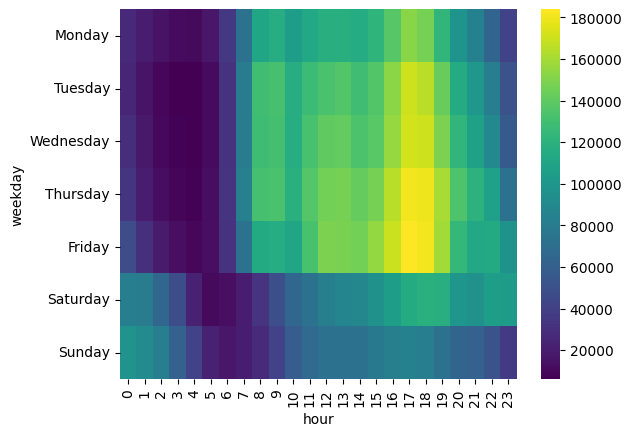

In [40]:
#NUMBER OF RIDES PER HOUR
pivot_table_trip_count = tempdf.pivot_table(index='weekday', columns='hour', values='trip_seconds', aggfunc='size')
pivot_table_trip_count = pivot_table_trip_count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the heatmap
sns.heatmap(pivot_table_trip_count, cmap='viridis')

## Heat Map of Trip Seconds

<Axes: xlabel='hour', ylabel='weekday'>

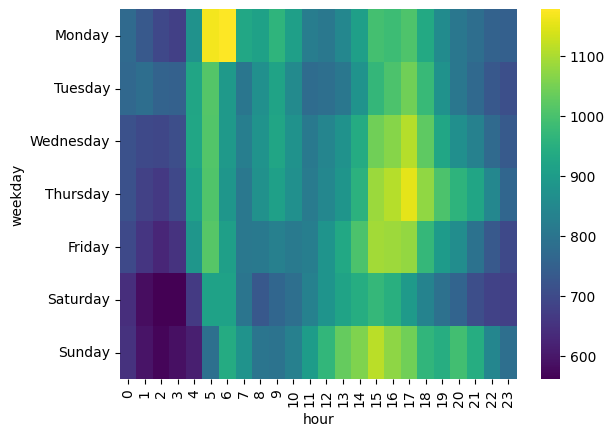

In [41]:
pivot_table_trip_seconds = tempdf.pivot_table(index='weekday', columns='hour', values='trip_seconds', aggfunc='mean')
pivot_table_trip_seconds = pivot_table_trip_seconds.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(pivot_table_trip_seconds, cmap='viridis') #trip seconds

## Heat Map of Tips

<Axes: xlabel='hour', ylabel='weekday'>

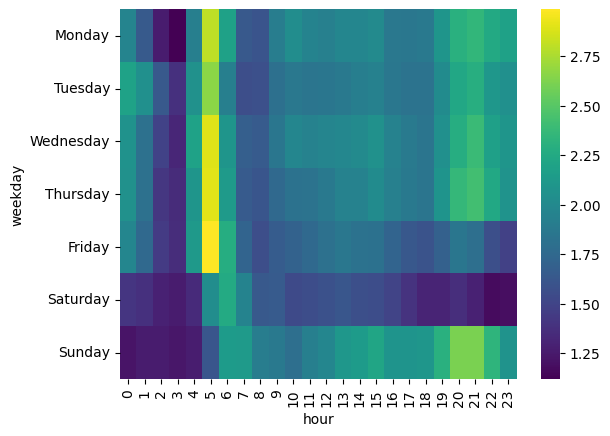

In [42]:
pivot_table_count = tempdf.pivot_table(index='weekday', columns='hour',values="tips",aggfunc='mean')
pivot_table_count = pivot_table_count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(pivot_table_count, cmap='viridis') #tip count

# Idle Time

In [43]:
df_sorted = df.sort_values(by=['taxi_id', 'trip_start_timestamp'])
df_sorted['idle_time'] = df_sorted.groupby('taxi_id')['trip_start_timestamp'].shift(-1) - df_sorted['trip_end_timestamp']
idledf = df_sorted.groupby('taxi_id')['idle_time'].mean().reset_index()
idledf

,taxi_id,idle_time
0,001330b81e23412049f9c3eff5b6e972a91afe59c9aa36...,0 days 01:43:19.010568922
1,0013da5489fe976daf4f4a7d246073ecf2caed9b12b3be...,0 days 02:11:58.058628318
2,0044e6c0d091476299b99345501f756b23632a96cbaf40...,0 days 03:12:16.789431545
3,00752524a4118a162dce62ff49c0eb0f79530d9e0ecb5a...,0 days 03:35:22.656597067
4,0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4...,0 days 14:48:08.372093023
...,...,...
5706,ffd70d111c7da2e5eff27ad900c8eb94d74fe286bb7aa5...,0 days 02:49:41.571428571
5707,ffda53354c610fd3af1aee46d723028a49014e35f7280c...,0 days 01:48:54.701834862
5708,ffe8d8153b8f68cd20871ae5710f9b799bcc517b40ece7...,0 days 02:19:10.400000
5709,fff3279af11dfade5e308184a5cc6c1ca2d33764634d96...,0 days 03:12:44.963205233


I discontinued this analysis, because i figured that taxi_id represents a unique vehicle rather than a unique taxi driver. Thus, there could be multiple drivers operating one taxi over the course of the year.

# Correlation grouped by hour

In [169]:
corrdf = df.copy()

In [170]:
corrdf['date_hour'] = corrdf['trip_middle_timestamp'].dt.floor('h')
hourly_rides = corrdf.groupby('date_hour').size().reset_index(name='num_rides')
hourly_precipitation = corrdf.groupby('date_hour')['precipitation'].mean().reset_index()
hourly_temperature = corrdf.groupby('date_hour')['temperature'].mean().reset_index()
hourly_price_per_mile = corrdf.groupby('date_hour')['price_per_mile'].mean().reset_index()
hourly_trip_total = corrdf.groupby('date_hour')['trip_total'].mean().reset_index()
# Merge the DataFrames
hourly_data = pd.merge(hourly_rides, hourly_precipitation, on='date_hour')
hourly_data = pd.merge(hourly_data, hourly_temperature, on='date_hour')
hourly_data = pd.merge(hourly_data, hourly_price_per_mile, on='date_hour')
hourly_data = pd.merge(hourly_data, hourly_trip_total, on='date_hour')
hourly_data['hour'] = hourly_data['date_hour'].dt.hour
hourly_data["weekend"] = pd.DatetimeIndex(hourly_data['date_hour']).dayofweek >= 5

## Bar Plot of Average Trips per Hour (depending on Percipitation)

Text(0.5, 1.0, 'Number of Taxi Rides with Precipitation > 0 vs. Precipitation = 0')

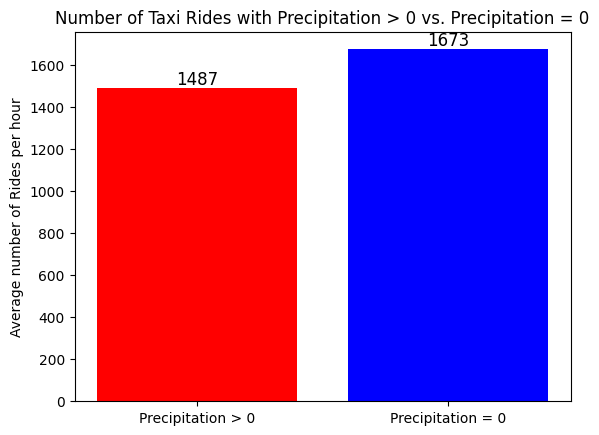

In [171]:
rides_precip_nonzero = hourly_data[hourly_data["precipitation"] > 0]["num_rides"].mean()
rides_precip_zero = hourly_data[hourly_data["precipitation"] == 0]["num_rides"].mean()

plot_data = pd.DataFrame({
    'Condition': ['Precipitation > 0', 'Precipitation = 0'],
    'Number of Rides': [rides_precip_nonzero, rides_precip_zero]
})

bar_plot = plt.bar(plot_data['Condition'], plot_data['Number of Rides'], color=['red', 'blue'])

for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.ylabel('Average number of Rides per hour')
plt.title('Number of Taxi Rides with Precipitation > 0 vs. Precipitation = 0')

It should be noted that it rains a lot more at night where less rides occur. This plot shows that:

## Line Plot of Average Percipitation per Hour

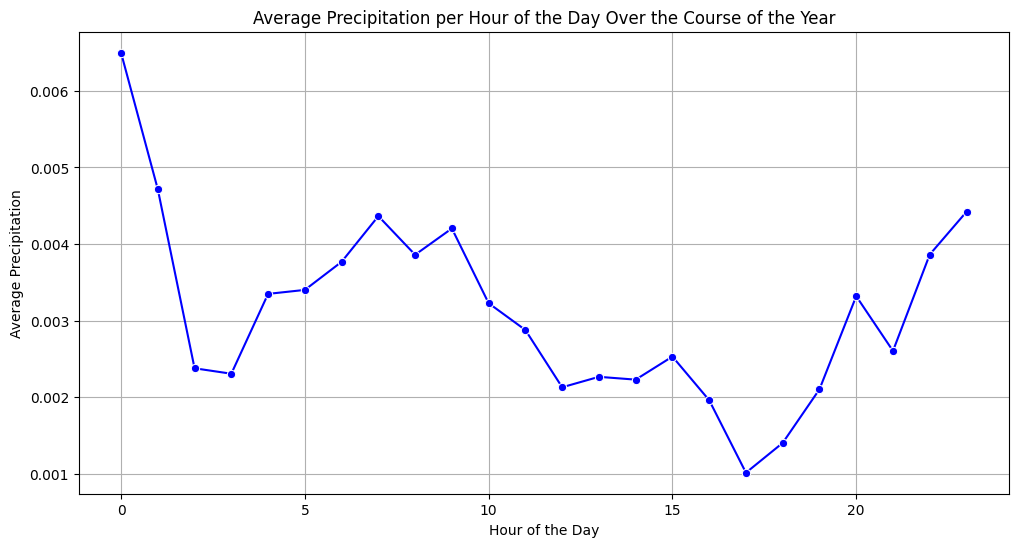

In [172]:
hourly_precipitation = hourly_data.groupby('hour')['precipitation'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='precipitation', data=hourly_precipitation, marker='o', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation per Hour of the Day Over the Course of the Year')
plt.grid(True)

Thus, I created a plot that also incorporates the usual average per hour as a baseline:

## Line Plot of Average Number of Trips per Hour (depending on Percipitation)

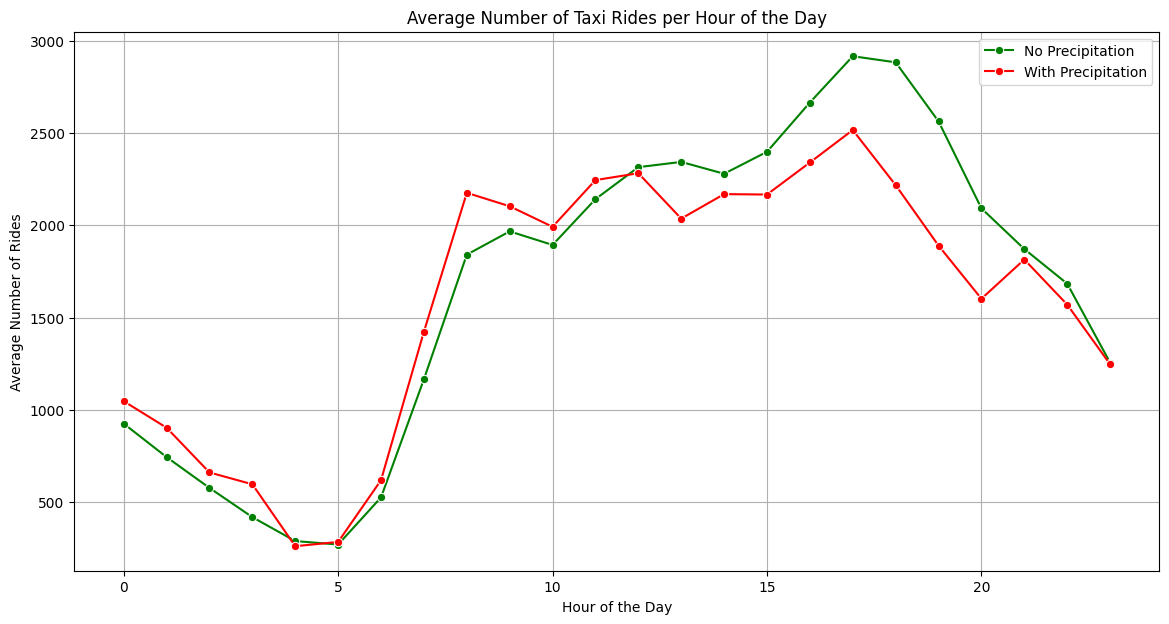

In [173]:
hourly_num_rides_no_rain = hourly_data[hourly_data["precipitation"]==0].groupby('hour')['num_rides'].mean().reset_index()
hourly_num_rides_rain = hourly_data[hourly_data["precipitation"]>0].groupby('hour')['num_rides'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='hour', y='num_rides', data=hourly_num_rides_no_rain, label='No Precipitation', marker='o', color='green')
sns.lineplot(x='hour', y='num_rides', data=hourly_num_rides_rain, label='With Precipitation', marker='o', color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rides')
plt.title('Average Number of Taxi Rides per Hour of the Day')
plt.legend()
plt.grid(True)

It seems like rain could have a positive effects on rides at night, but a negative effect during the day. Effects could be marginal.

## Plot Title

In [174]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Extract temperature and number of rides
X = hourly_data['temperature'].values.reshape(-1, 1)
y = hourly_data['num_rides'].values

# Create polynomial features
poly = PolynomialFeatures(degree=3)  
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_poly_pred = model.predict(X_poly)

# Add predictions to the DataFrame for plotting
hourly_data['num_rides_poly_pred'] = y_poly_pred

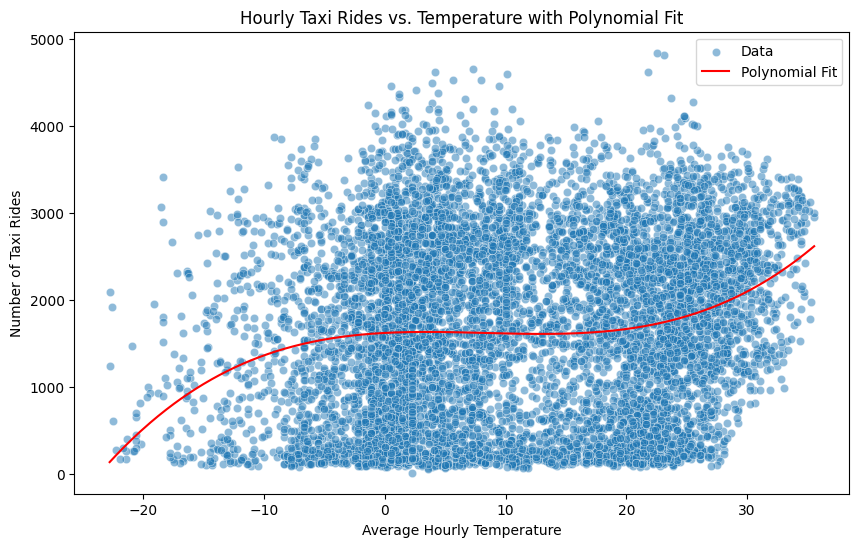

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='num_rides', data=hourly_data, alpha=0.5, label='Data')

# Sort the data for plotting the line
sorted_data = hourly_data.sort_values('temperature')
plt.plot(sorted_data['temperature'], sorted_data['num_rides_poly_pred'], color='red', label='Polynomial Fit')

plt.title('Hourly Taxi Rides vs. Temperature with Polynomial Fit')
plt.xlabel('Average Hourly Temperature')
plt.ylabel('Number of Taxi Rides')
plt.legend()
plt.show()

## Plot Title

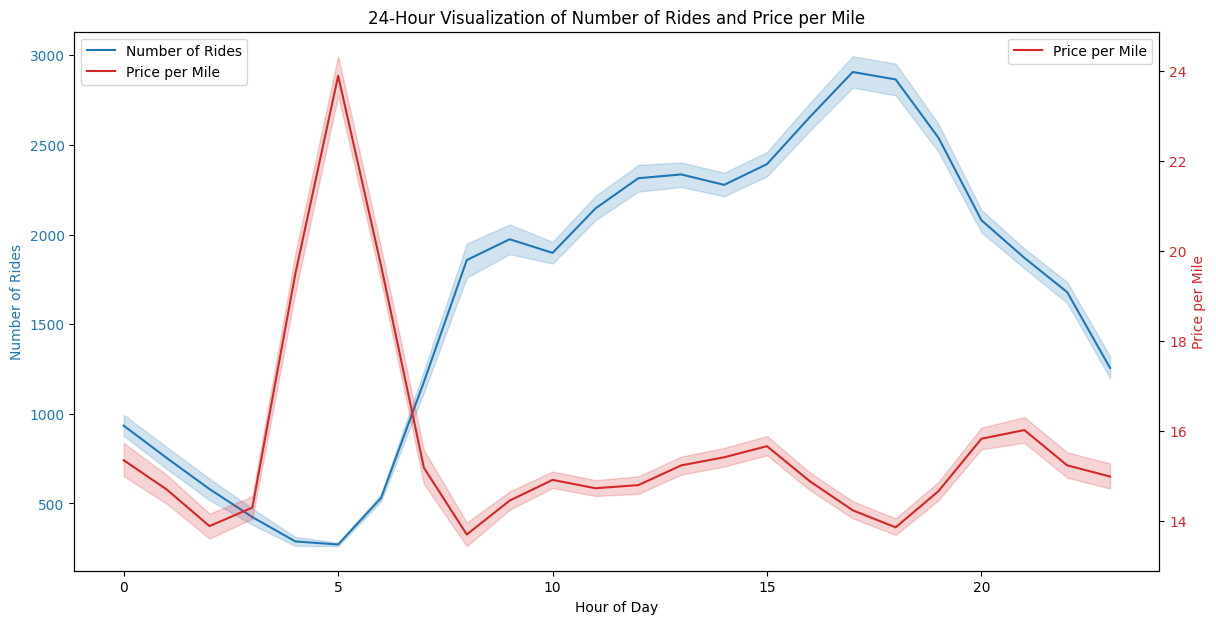

In [176]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot number of rides
color = 'tab:blue'
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Rides', color=color)
line1 = sns.lineplot(x='hour', y='num_rides', data=hourly_data, ax=ax1, color=color, label='Number of Rides')
ax1.tick_params(axis='y', labelcolor=color)

# Plot price per mile
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Price per Mile', color=color)
line2 = sns.lineplot(x='hour', y='price_per_mile', data=hourly_data, ax=ax2, color=color, label='Price per Mile')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and show plot
plt.title('24-Hour Visualization of Number of Rides and Price per Mile')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


## Plot Title

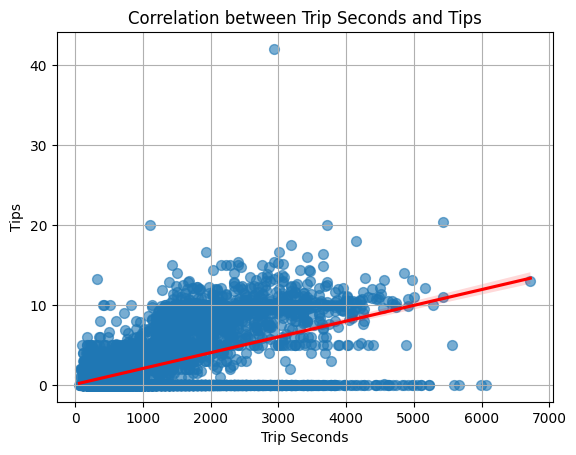

In [177]:
sns.regplot(x='trip_seconds', y='tips', data=df.sample(10000), scatter_kws={'s':50, 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Trip Seconds and Tips')
plt.xlabel('Trip Seconds')
plt.ylabel('Tips')
plt.grid(True)

# Temporal Analysis

## Plot Title

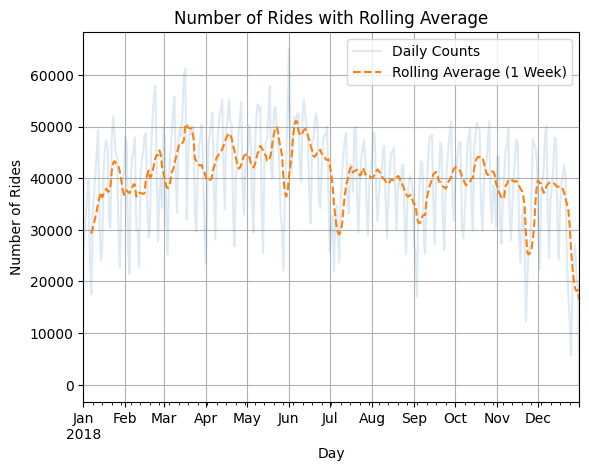

In [64]:
temp = df['trip_middle_timestamp'].dt.to_period('D')
daily_counts = temp.value_counts().sort_index()
daily_counts_rolling = daily_counts.rolling(window=7).mean()

daily_counts.plot(label='Daily Counts', alpha=0.15)
daily_counts_rolling.plot(label='Rolling Average (1 Week)', linestyle='--')
plt.title('Number of Rides with Rolling Average')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(True)

## Plot Title

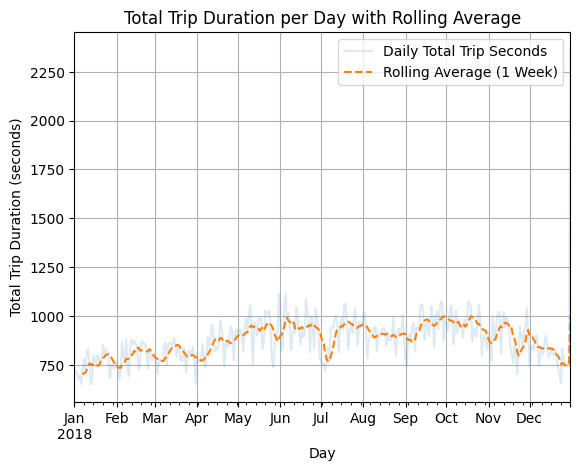

In [66]:
daily_trip_seconds = df.groupby(df['trip_middle_timestamp'].dt.to_period('D'))['trip_seconds'].mean().sort_index()
daily_trip_seconds_rolling = daily_trip_seconds.rolling(window=7).mean()

daily_trip_seconds.plot(label='Daily Average Trip Seconds', alpha=0.15)
daily_trip_seconds_rolling.plot(label='Rolling Average (1 Week)', linestyle='--')
plt.title('Average Trip Duration per Day with Rolling Average')
plt.xlabel('Day')
plt.ylabel('Total Trip Duration (seconds)')
plt.legend()
plt.grid(True)

## Plot Title

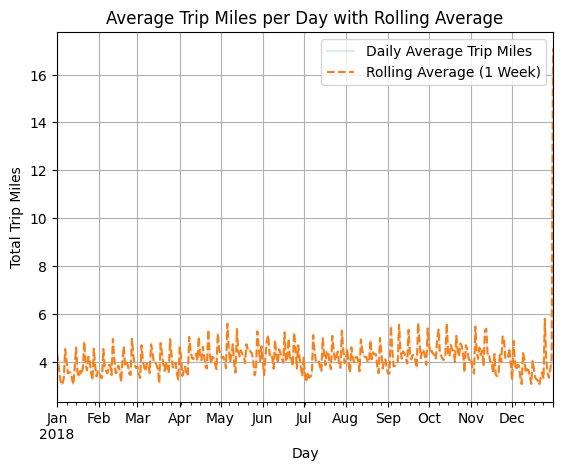

In [69]:
daily_trip_miles = df.groupby(df['trip_middle_timestamp'].dt.to_period('D'))['trip_miles'].mean().sort_index()
daily_trip_miles_rolling = daily_trip_miles.rolling(window=7).mean()

daily_trip_miles.plot(label='Daily Average Trip Miles', alpha=0.15)
daily_trip_miles.plot(label='Rolling Average (1 Week)', linestyle='--')
plt.title('Average Trip Miles per Day with Rolling Average')
plt.xlabel('Day')
plt.ylabel('Total Trip Miles')
plt.legend()
plt.grid(True)

# Payment Type Analysis

In [96]:
payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

In [98]:
payment_counts

,payment_type,count
0,Credit Card,7339690
1,Cash,7017183
2,Mobile,105563
3,Prcard,43971
4,Unknown,25556
5,No Charge,22187
6,Dispute,3361
7,Pcard,2649
8,Split,1271
9,Prepaid,597


## Plot Title

C:\Users\marlxn\AppData\Local\Temp\ipykernel_10836\366437917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='payment_type', y='count', data=payment_counts, palette='viridis')


Text(0.5, 1.0, 'Number of Rides per Payment Type')

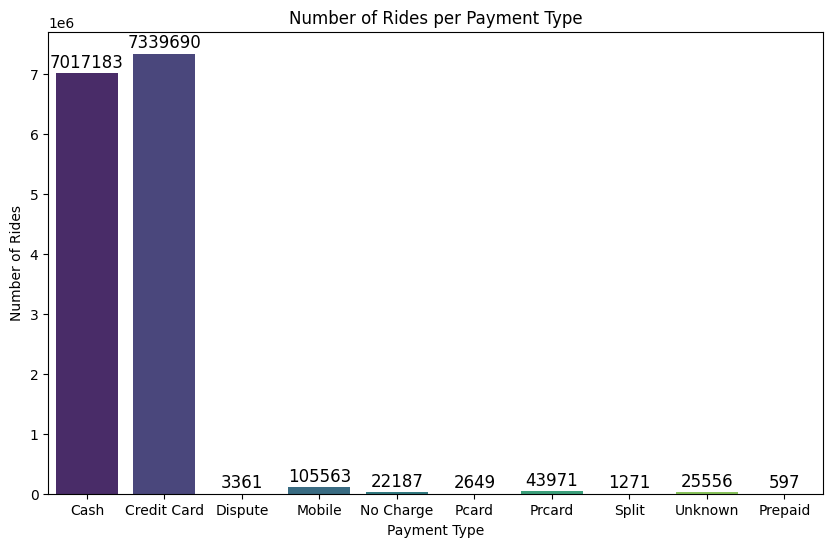

In [117]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='payment_type', y='count', data=payment_counts, palette='viridis')

# Add annotations without decimal places
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{int(height)}', 
                     (bar.get_x() + bar.get_width() / 2, 
                      height), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')

plt.xlabel('Payment Type')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per Payment Type')

## Plot Title

C:\Users\marlxn\AppData\Local\Temp\ipykernel_10836\1553735075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_payment_counts = df.groupby(['hour', 'payment_type']).size().reset_index(name='count')


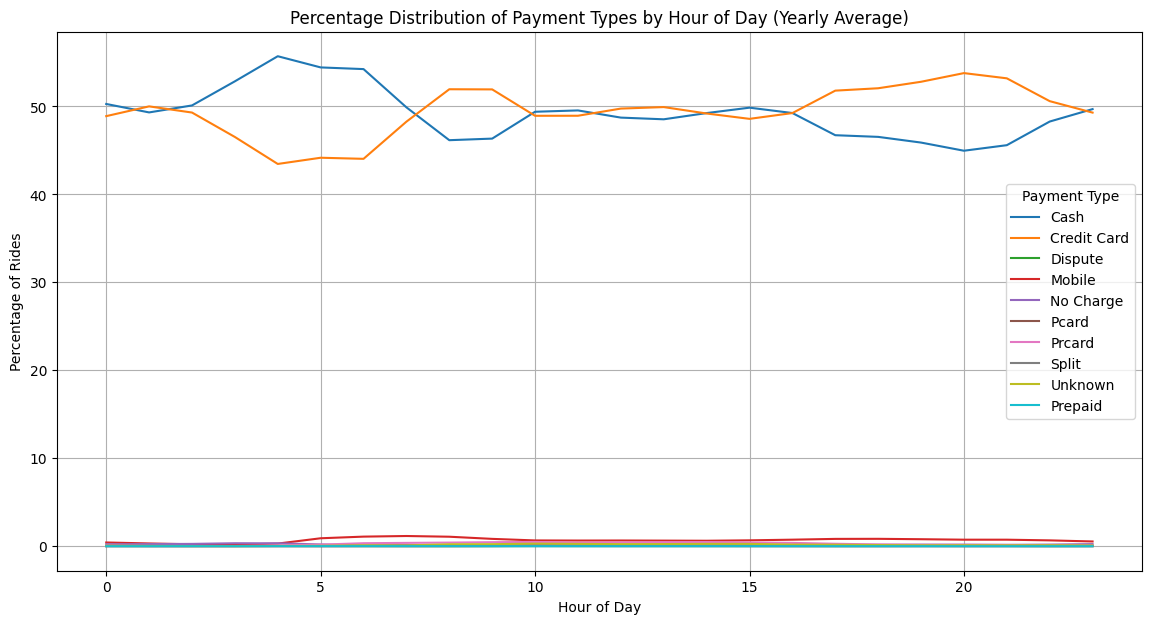

In [127]:
df['hour'] = df['trip_middle_timestamp'].dt.hour
hourly_payment_counts = df.groupby(['hour', 'payment_type']).size().reset_index(name='count')
total_counts_per_hour = hourly_payment_counts.groupby('hour')['count'].sum().reset_index(name='total_count')
hourly_payment_counts = pd.merge(hourly_payment_counts, total_counts_per_hour, on='hour')
hourly_payment_counts['percentage'] = (hourly_payment_counts['count'] / hourly_payment_counts['total_count']) * 100
pivot_data = hourly_payment_counts.pivot(index='hour', columns='payment_type', values='percentage').fillna(0)
pivot_data = pivot_data.reset_index()

plt.figure(figsize=(14, 7))

for payment_type in pivot_data.columns[1:]:
    plt.plot(pivot_data['hour'], pivot_data[payment_type], label=payment_type)

plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Rides')
plt.title('Percentage Distribution of Payment Types by Hour of Day (Yearly Average)')
plt.legend(title='Payment Type')
plt.grid(True)

# Section Title

In [18]:
test_df = pd.read_csv('../data/analytics_trip_data.csv')

In [20]:
test_df

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,dropoff_centroid_location,h3_res_4,h3_res_6,h3_res_8,h3_res_4_dropoff,h3_res_6_dropoff,h3_res_8_dropoff,date,temperature,precipitation
0,0a0a2ca50df85134ce34f0c2c7bda6e78ca2a52c,bbe793119144e0bd97a4268af2a28ed0f3dad49545592c...,2018-01-01 00:15:00,2018-01-01 00:15:00,180.0,0.00,1.703108e+10,1.703132e+10,8.0,32.0,...,POINT (-87.6209929134 41.8849871918),862664c1fffffff,842664dffffffff,882664c1e1fffff,842664dffffffff,862664c1fffffff,882664c1e3fffff,2018-01-01 01:53:00,-18.333333,0.0
1,d5d00fe6f098623a12325194a3c9b9c8259addac,12052a7776cbfcf53d9daa2805ef852de2dbfb28bc38a6...,2018-01-01 00:15:00,2018-01-01 00:15:00,217.0,0.61,1.703184e+10,1.703132e+10,32.0,32.0,...,POINT (-87.6209929134 41.8849871918),862664c1fffffff,842664dffffffff,882664c1a9fffff,842664dffffffff,862664c1fffffff,882664c1e3fffff,2018-01-01 01:53:00,-18.333333,0.0
2,4d1b86ec3bad2e8a8b0273223d79cef7600b2821,bbdec1f9949f4e13be32d6d0038763a29f09ef18534115...,2018-01-01 00:15:00,2018-01-01 00:30:00,840.0,4.20,NaN,NaN,8.0,22.0,...,POINT (-87.69915534320002 41.9227606205),862664c1fffffff,842664dffffffff,882664c1edfffff,842664dffffffff,862664ca7ffffff,882664ca11fffff,2018-01-01 01:53:00,-18.333333,0.0
3,59c63295676feae18f036452c2df04af9652f956,bda6300ce64bfe977c79eb92ade7d37b6d4e05fed81151...,2018-01-01 00:15:00,2018-01-01 00:30:00,294.0,0.85,NaN,NaN,24.0,24.0,...,POINT (-87.6763559892 41.90120699410001),862664cafffffff,842664dffffffff,882664cac3fffff,842664dffffffff,862664cafffffff,882664cac3fffff,2018-01-01 01:53:00,-18.333333,0.0
4,12c6e02f7d25c503736dae233ce2281a815dc67a,28d27337bea07d811235348e9b25af937d110ac08ca576...,2018-01-01 00:15:00,2018-01-01 00:30:00,486.0,4.55,NaN,NaN,28.0,35.0,...,POINT (-87.6186777673 41.8351179863),862664cafffffff,842664dffffffff,882664ca91fffff,842664dffffffff,862664cf7ffffff,882664cf53fffff,2018-01-01 01:53:00,-18.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158863,b21a8da29116e47f8cf60719f5ba9e8981b1aff2,b0f4966a7a652995c265e8bd0611316732b732c0aeffe6...,2018-01-07 16:45:00,2018-01-07 17:00:00,420.0,1.50,NaN,NaN,6.0,7.0,...,POINT (-87.6494887289 41.9226862843),862664c17ffffff,842664dffffffff,882664c163fffff,842664dffffffff,862664c17ffffff,882664c107fffff,2018-01-07 16:53:00,-1.666667,0.0
158864,e50f8bc5264cb1f4884365350b11d04b5b60e5f1,46182a244f8a81ba3c58545e7259ffe8ce0ade1911da25...,2018-01-07 16:45:00,2018-01-07 16:45:00,480.0,0.00,1.703108e+10,1.703133e+10,8.0,33.0,...,POINT (-87.61735800610001 41.859349715),862664c1fffffff,842664dffffffff,882664c1e3fffff,842664dffffffff,862664c1fffffff,882664c1b1fffff,2018-01-07 16:53:00,-1.666667,0.0
158865,63672e056c56b414dd9ce17c45dd950e471edce6,f45bc801916dd442e000df41a2fbfe08d4b53e6058adc8...,2018-01-07 16:45:00,2018-01-07 17:00:00,540.0,0.00,1.703128e+10,1.703184e+10,28.0,32.0,...,POINT (-87.63274648869999 41.8809944707),862664c1fffffff,842664dffffffff,882664c1adfffff,842664dffffffff,862664c1fffffff,882664c1a9fffff,2018-01-07 16:53:00,-1.666667,0.0
158866,1cd94c2adc9c7ed848fc22bbd8a237f6d2731deb,bfec2c659fcbed3b508dc6caaf6f7ef39e17801e8ca0cc...,2018-01-07 16:45:00,2018-01-07 17:00:00,660.0,2.20,1.703132e+10,1.703107e+10,32.0,7.0,...,POINT (-87.63171736610001 41.9146162864),862664c1fffffff,842664dffffffff,882664c1e3fffff,842664dffffffff,862664c17ffffff,882664c115fffff,2018-01-07 16:53:00,-1.666667,0.0


# Data Preparation

In [135]:
chicago_taxi_df = pd.read_csv('../data/chicago_taxi_data.csv')

In [136]:
chicago_taxi_df = chicago_taxi_df[chicago_taxi_df['trip_seconds'] > 0]
chicago_taxi_df = chicago_taxi_df[chicago_taxi_df['trip_miles'] > 0]

In [137]:
# Convert trip_start_timestamp to datetime
chicago_taxi_df['trip_start_timestamp'] = pd.to_datetime(chicago_taxi_df['trip_start_timestamp'])

# Extract day of the week, hour, and month from the timestamp
chicago_taxi_df['day_of_week'] = chicago_taxi_df['trip_start_timestamp'].dt.dayofweek
chicago_taxi_df['day_name'] = chicago_taxi_df['trip_start_timestamp'].dt.day_name()
chicago_taxi_df['hour'] = chicago_taxi_df['trip_start_timestamp'].dt.hour
chicago_taxi_df['month'] = chicago_taxi_df['trip_start_timestamp'].dt.month
chicago_taxi_df['month_name'] = chicago_taxi_df['trip_start_timestamp'].dt.month_name()
chicago_taxi_df['date'] = chicago_taxi_df['trip_start_timestamp'].dt.date

In [138]:
chicago_taxi_df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,day_of_week,day_name,hour,month,month_name,date
0,d7bf7332e89c6597d682495ac78a325c2ed4183f,d0653a3c1a990641559a9e6e7c0e07db3765fe11e48ad7...,2018-01-01 00:15:00,2018-01-01T00:30:00.000,1080.0,3.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01
1,c8769473b60b18f700afce0f812f6d80c3616ca7,21c5d83c2cb73035c6c4d35da452ff1714aff86f5efb32...,2018-01-01 00:15:00,2018-01-01T00:30:00.000,240.0,0.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01
2,c52d1cd141c3036d091ed85cbf7a973cc5c1243e,a6c3cb7ab4c037a7db9e2fd3513f28e0ff17c8547a70bd...,2018-01-01 00:15:00,2018-01-01T00:15:00.000,60.0,0.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01
3,b5714d1d2118642f789ab0fec542f597f986c251,d8238dd38b47fc0268e0bd92bba094676752dfefeafea9...,2018-01-01 00:15:00,2018-01-01T00:30:00.000,840.0,2.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01
5,594e15b562a96bd7cafac7211fb71ff4331ee803,45ae9d400abb9327b717e4d8849843ad78e40d7a72e324...,2018-01-01 00:15:00,2018-01-01T00:30:00.000,720.0,6.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Monday,0,1,January,2018-01-01


In [139]:
chicago_taxi_df.describe()

,trip_start_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,day_of_week,hour,month
count,482177,482177.000000,482177.000000,3.062560e+05,3.044950e+05,440815.000000,429922.000000,482170.000000,482170.000000,340655.000000,482170.000000,482170.000000,440857.000000,440857.000000,431156.000000,431156.000000,482177.000000,482177.000000,482177.0
mean,2018-01-07 00:41:41.693776384,760.863303,3.844461,1.703141e+10,1.703137e+10,25.736758,21.913596,12.866763,1.539311,0.002411,0.920909,15.447353,41.899708,-87.662757,41.899357,-87.651834,2.387615,13.201194,1.0
min,2018-01-01 00:15:00,1.000000,0.010000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625,0.000000,0.000000,1.0
25%,2018-01-04 08:00:00,337.000000,0.800000,1.703108e+10,1.703108e+10,8.000000,8.000000,6.000000,0.000000,0.000000,0.000000,7.000000,41.880994,-87.655879,41.880994,-87.655998,1.000000,9.000000,1.0
50%,2018-01-06 21:15:00,540.000000,1.490000,1.703128e+10,1.703128e+10,28.000000,24.000000,7.750000,0.000000,0.000000,0.000000,9.250000,41.892042,-87.632746,41.892073,-87.632746,2.000000,14.000000,1.0
75%,2018-01-10 05:15:00,900.000000,3.700000,1.703184e+10,1.703184e+10,32.000000,32.000000,13.250000,2.000000,0.000000,1.000000,15.000000,41.901207,-87.626211,41.906026,-87.626211,4.000000,18.000000,1.0
max,2018-01-12 10:30:00,84325.000000,527.100000,1.703198e+10,1.703198e+10,77.000000,77.000000,6001.200000,162.750000,75.000000,1414.120000,6001.200000,42.015934,-87.534903,42.021224,-87.534903,6.000000,23.000000,1.0
std,NaN,1045.870981,5.692938,3.439489e+05,3.304136e+05,20.375974,17.107250,19.315538,2.723360,0.240304,3.709279,21.887671,0.039890,0.078765,0.038070,0.055631,1.684488,5.790474,0.0


# Data Exploration

## Histogram of Trip Miles

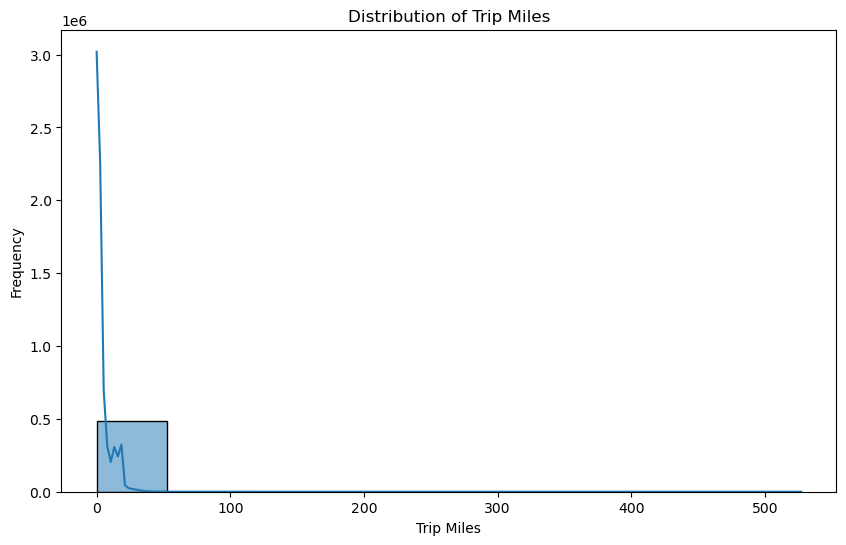

In [142]:
# Plot a distribution plot for the 'trip_miles' variable using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['trip_miles'], bins=10, kde=True)
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Miles')
plt.show()

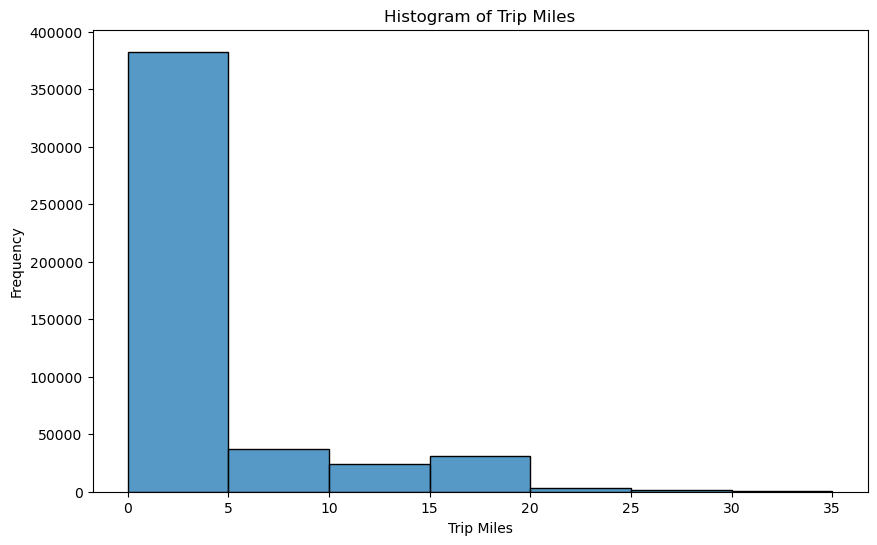

In [143]:
# Define the bin edges
bins = range(0, 36, 5)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['trip_miles'], bins=bins, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

## Histogram of Trip Seconds

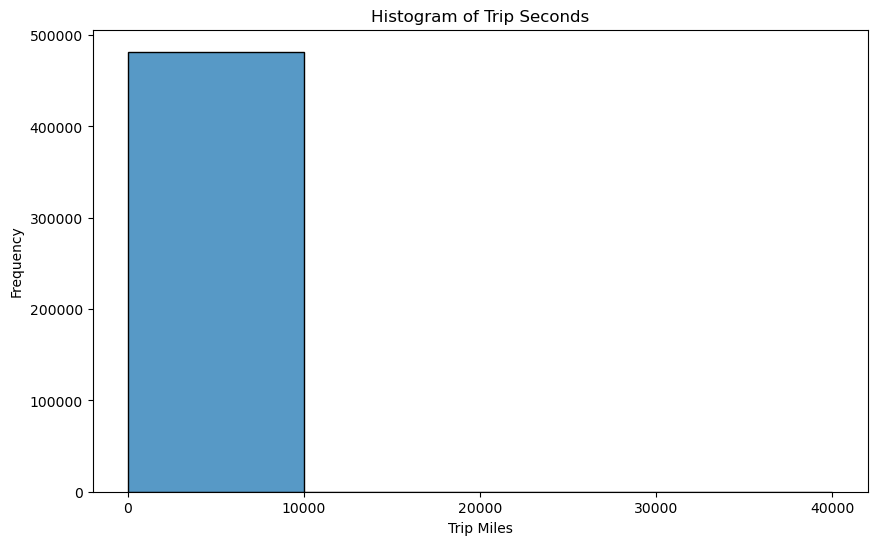

In [145]:
# Define the bin edges
bins = range(0, 50000, 10000)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['trip_seconds'], bins=bins, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Seconds')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

## Histogram of Trip Minutes

In [147]:
# Convert trip_seconds to trip_minutes
chicago_taxi_df['trip_minutes'] = chicago_taxi_df['trip_seconds'] / 60

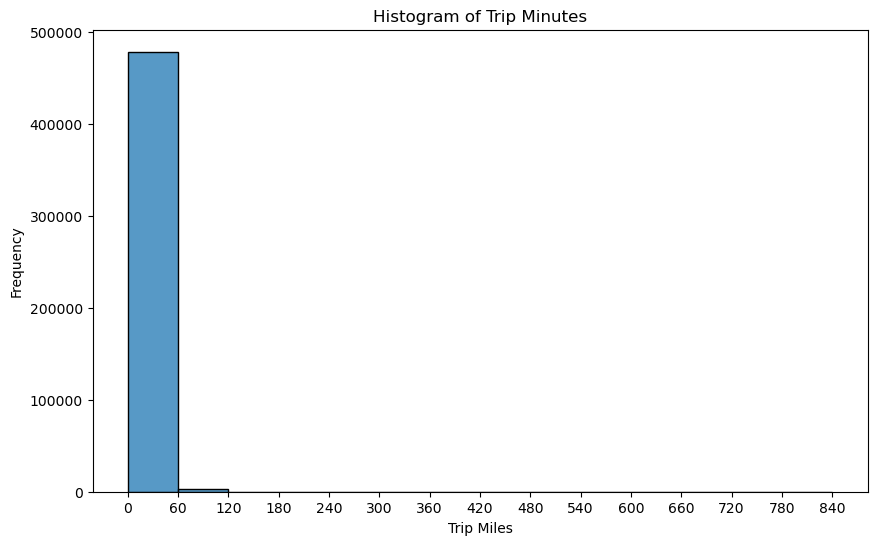

In [148]:
# Define the bin edges
bins = range(0, 900, 60)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['trip_minutes'], bins=bins, edgecolor='black')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Minutes')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

In [149]:
# Select rows where trip_minutes is <= 60
filtered_df = chicago_taxi_df[chicago_taxi_df['trip_minutes'] <= 60]

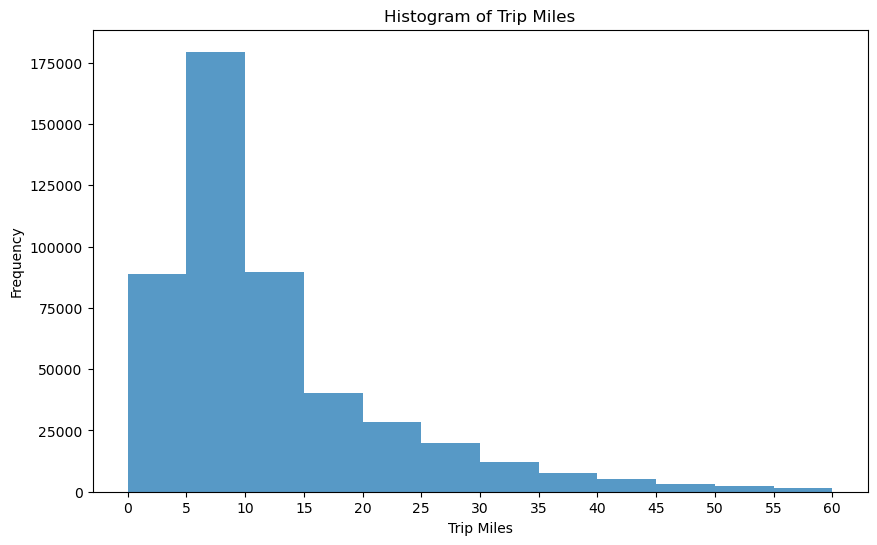

In [150]:
# Define the bin edges
bins = range(0, 65, 5)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['trip_minutes'], bins=bins, edgecolor=None)
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Miles')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

## Taxi Companies

In [152]:
chicago_taxi_df['company'].value_counts()

company
Flash Cab                                       72388
Taxi Affiliation Service Yellow                 39931
Chicago Carriage Cab Corp                       38212
Yellow Cab                                      35172
City Service                                    34569
                                                ...  
3721 - Santamaria Express, Alvaro Santamaria       24
5062 - 34841 Sam Mestas                            11
3669 - 85800 Jordan Taxi Inc                        9
2809 - 95474 C & D Cab Co Inc.                      6
2241 - 44667 - Felman Corp, Manuel Alonso           5
Name: count, Length: 65, dtype: int64

## Histogram of Fares

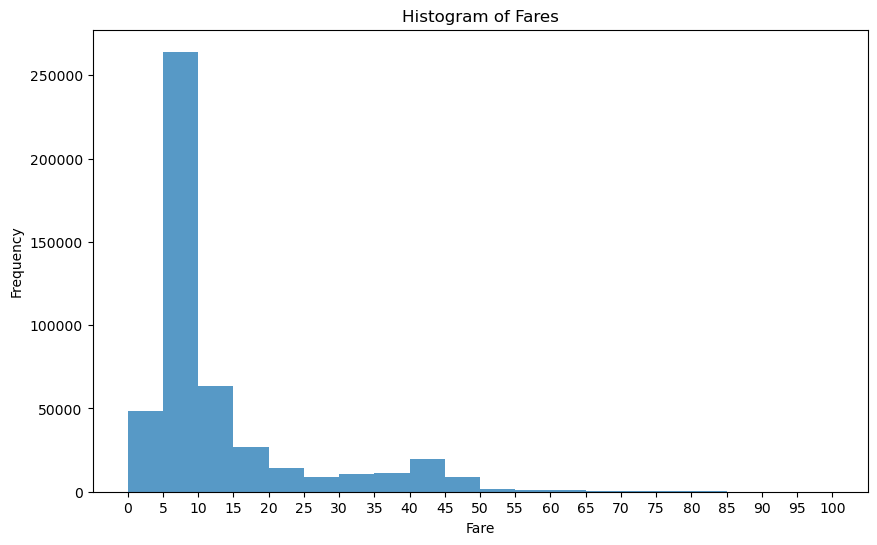

In [154]:
# Define the bin edges
bins = range(0, 105, 5)  # 0-5, 5-10, ..., 30-35

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(chicago_taxi_df['fare'], bins=bins, edgecolor=None)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fares')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

## Bar Plot of Payment Types

In [156]:
chicago_taxi_df['payment_type'].value_counts()

payment_type
Cash           263858
Credit Card    213751
Mobile           1495
Prcard           1468
Unknown           661
No Charge         527
Split             179
Dispute           139
Pcard              99
Name: count, dtype: int64

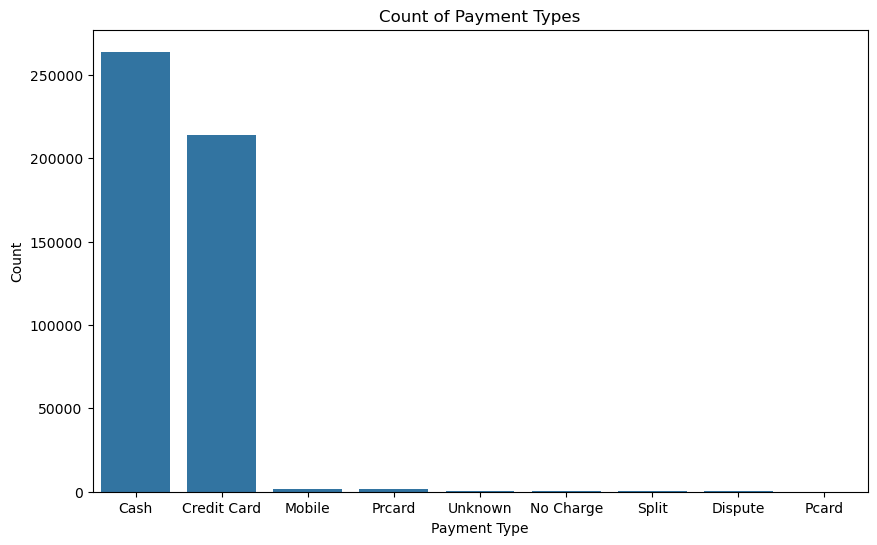

In [157]:
# Count the occurrences of each value in 'payment_type'
payment_counts = chicago_taxi_df['payment_type'].value_counts()

# Plot the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Count of Payment Types')
plt.show()

## Histogram of Total Cost by Payment Type

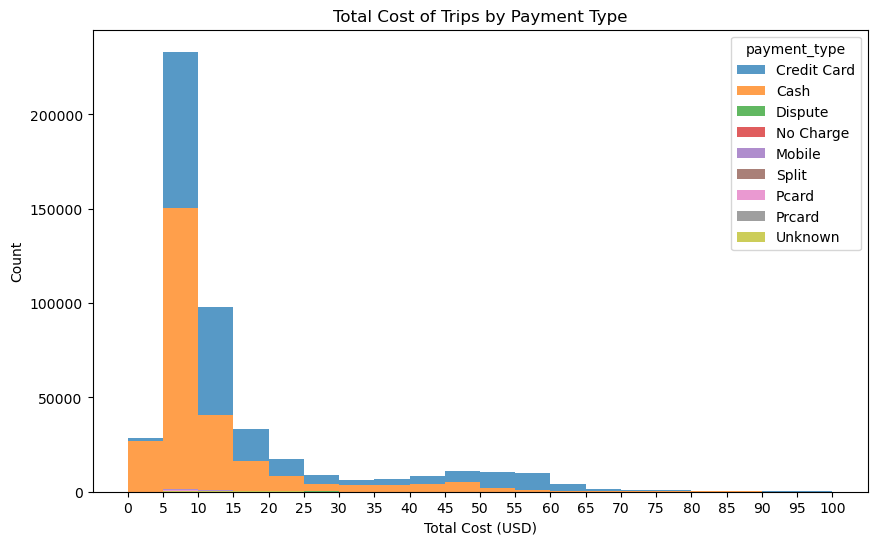

In [159]:
# Define the bin edges
bins = range(0, 105, 5)

# Plot the histogram with the specified bins using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=chicago_taxi_df, x='trip_total', hue='payment_type', multiple='stack', bins=bins, edgecolor=None)
plt.xlabel('Total Cost (USD)')
#plt.ylabel('Frequency')
plt.title('Total Cost of Trips by Payment Type')
plt.xticks(bins)  # Set x-axis ticks to bin edges
plt.show()

## Histogram of Cumulative Percentage of Trip Miles

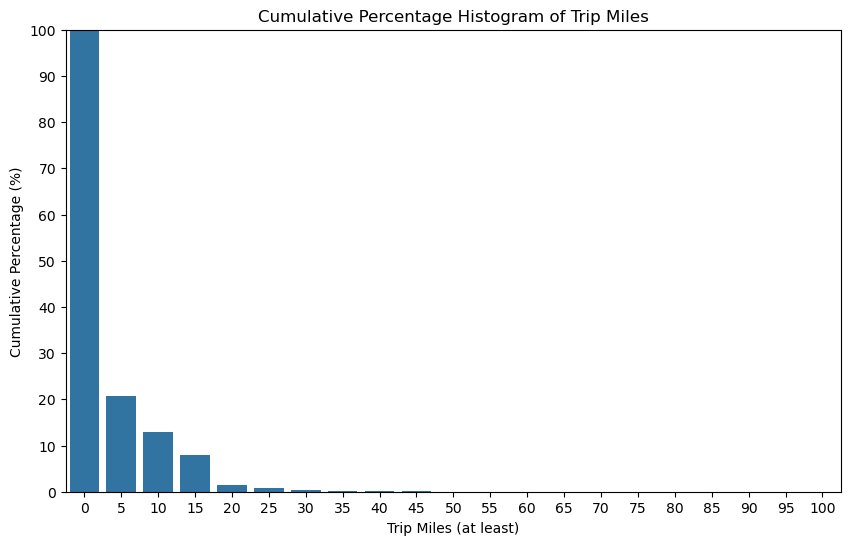

In [161]:
# Calculate cumulative counts
cumulative_counts = [(chicago_taxi_df['trip_miles'] >= b).sum() for b in bins]

# Calculate the total number of trips
total_trips = len(chicago_taxi_df)

# Calculate cumulative percentages
cumulative_percentages = [(count / total_trips) * 100 for count in cumulative_counts]

# Create a DataFrame for plotting
cumulative_df = pd.DataFrame({'Miles': bins, 'Percentage': cumulative_percentages})

# Plot the cumulative percentage histogram using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Miles', y='Percentage', data=cumulative_df)
plt.xlabel('Trip Miles (at least)')
plt.ylabel('Cumulative Percentage (%)')
plt.title('Cumulative Percentage Histogram of Trip Miles')
plt.ylim(0, 100)  # Set y-axis to range from 0 to 100%
plt.yticks(range(0, 110, 10))  # Add ticks at every 10%
plt.show()

## Bar Plot of Trips per Day

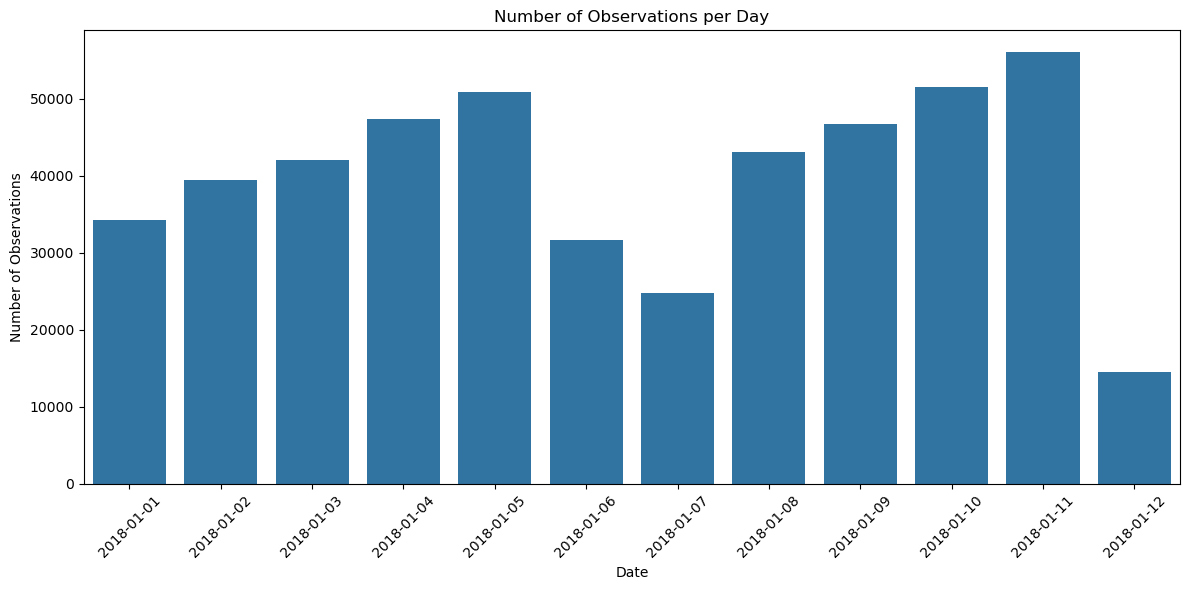

In [163]:
# Count observations per date
date_counts = chicago_taxi_df['date'].value_counts().sort_index().reset_index()
date_counts.columns = ['date', 'count']

# Plot the number of observations per day using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='count', data=date_counts)
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Day')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

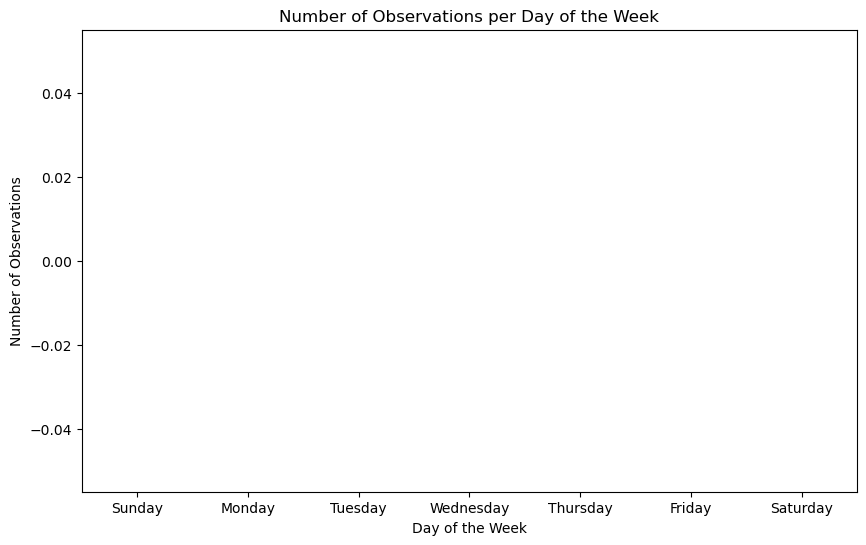

In [164]:
# Define the order of days for plotting
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Count observations per day of the week
day_counts = chicago_taxi_df['day_of_week'].value_counts().sort_index().reset_index()
day_counts.columns = ['day_of_week', 'count']

# Plot the number of observations per day of the week using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='count', data=day_counts, order=days_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Day of the Week')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pickup Centroid Locations on Chicago Map

In [166]:
# Filter out rows where pickup_centroid_location is NaN
chicago_taxi_df = chicago_taxi_df.dropna(subset=['pickup_community_area'])
chicago_taxi_df = chicago_taxi_df.dropna(subset=['dropoff_community_area'])

chicago_taxi_df['pickup_community_area'] = chicago_taxi_df['pickup_community_area'].astype(int)
chicago_taxi_df['dropoff_community_area'] = chicago_taxi_df['dropoff_community_area'].astype(int)

In [167]:
# Convert the string representation into actual dictionaries
def parse_location(location_str):
    return ast.literal_eval(location_str)

chicago_taxi_df['pickup_centroid_location'] = chicago_taxi_df['pickup_centroid_location'].apply(parse_location)
chicago_taxi_df['dropoff_centroid_location'] = chicago_taxi_df['dropoff_centroid_location'].apply(parse_location)

# Extract coordinates and create Point geometries
def create_point(location_dict):
    coords = location_dict['coordinates']
    return Point(coords[0], coords[1])

chicago_taxi_df['pickup_geometry'] = chicago_taxi_df['pickup_centroid_location'].apply(create_point)
chicago_taxi_df['dropoff_geometry'] = chicago_taxi_df['dropoff_centroid_location'].apply(create_point)

# Create a GeoDataFrame
pickup_gdf = gpd.GeoDataFrame(chicago_taxi_df, geometry='pickup_geometry')
dropoff_gdf = gpd.GeoDataFrame(chicago_taxi_df, geometry='dropoff_geometry')

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
pickup_gdf.set_crs(epsg=4326, inplace=True)
dropoff_gdf.set_crs(epsg=4326, inplace=True)

# Path to the shapefile of Chicago's boundaries
shapefile_path = '../data/Boundaries - Community Areas (current)/geo_export_9804d3cb-37ef-427a-9192-e8f531d8262f.shp'

# Read the shapefile using GeoPandas
chicago_map = gpd.read_file(shapefile_path)

# Ensure the CRS of the shapefile matches the GeoDataFrame CRS
chicago_map = chicago_map.to_crs(epsg=4326)

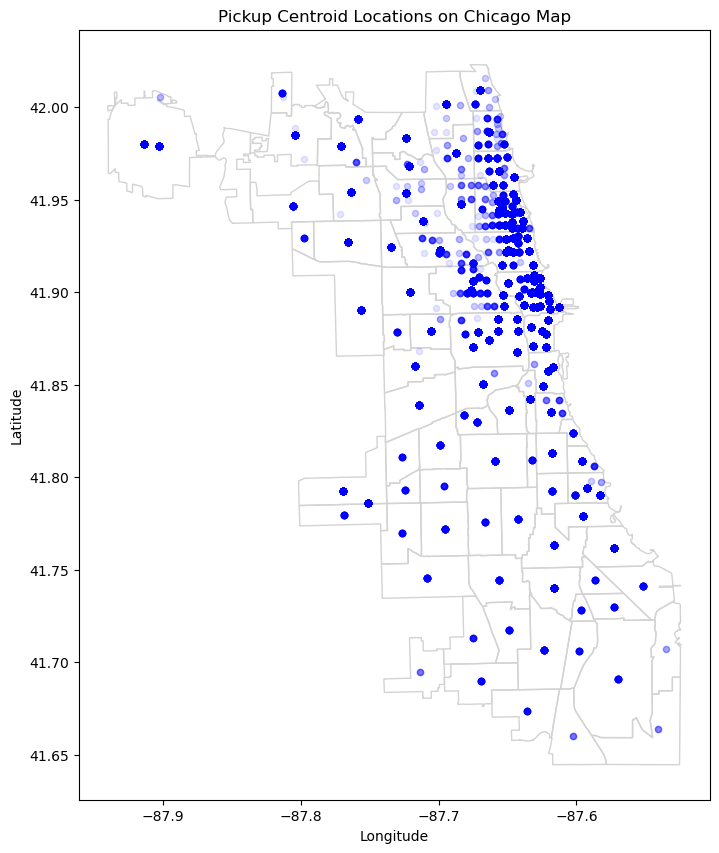

In [168]:
# Plot the map and the pickup locations
fig, ax = plt.subplots(figsize=(10, 10))
chicago_map.boundary.plot(ax=ax, linewidth=1, color='lightgray', zorder=1)
pickup_gdf.plot(ax=ax, marker='o', color='blue', markersize=20, zorder=3, alpha=0.1)
#dropoff_gdf.plot(ax=ax, marker='o', color='red', markersize=50, zorder=2, alpha=0.1)
plt.title('Pickup Centroid Locations on Chicago Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.grid(True)
plt.show()

# Dashboard

/var/folders/l2/9w71jzfn5vj666y5m4sqd5rc0000gn/T/ipykernel_2741/773689411.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)


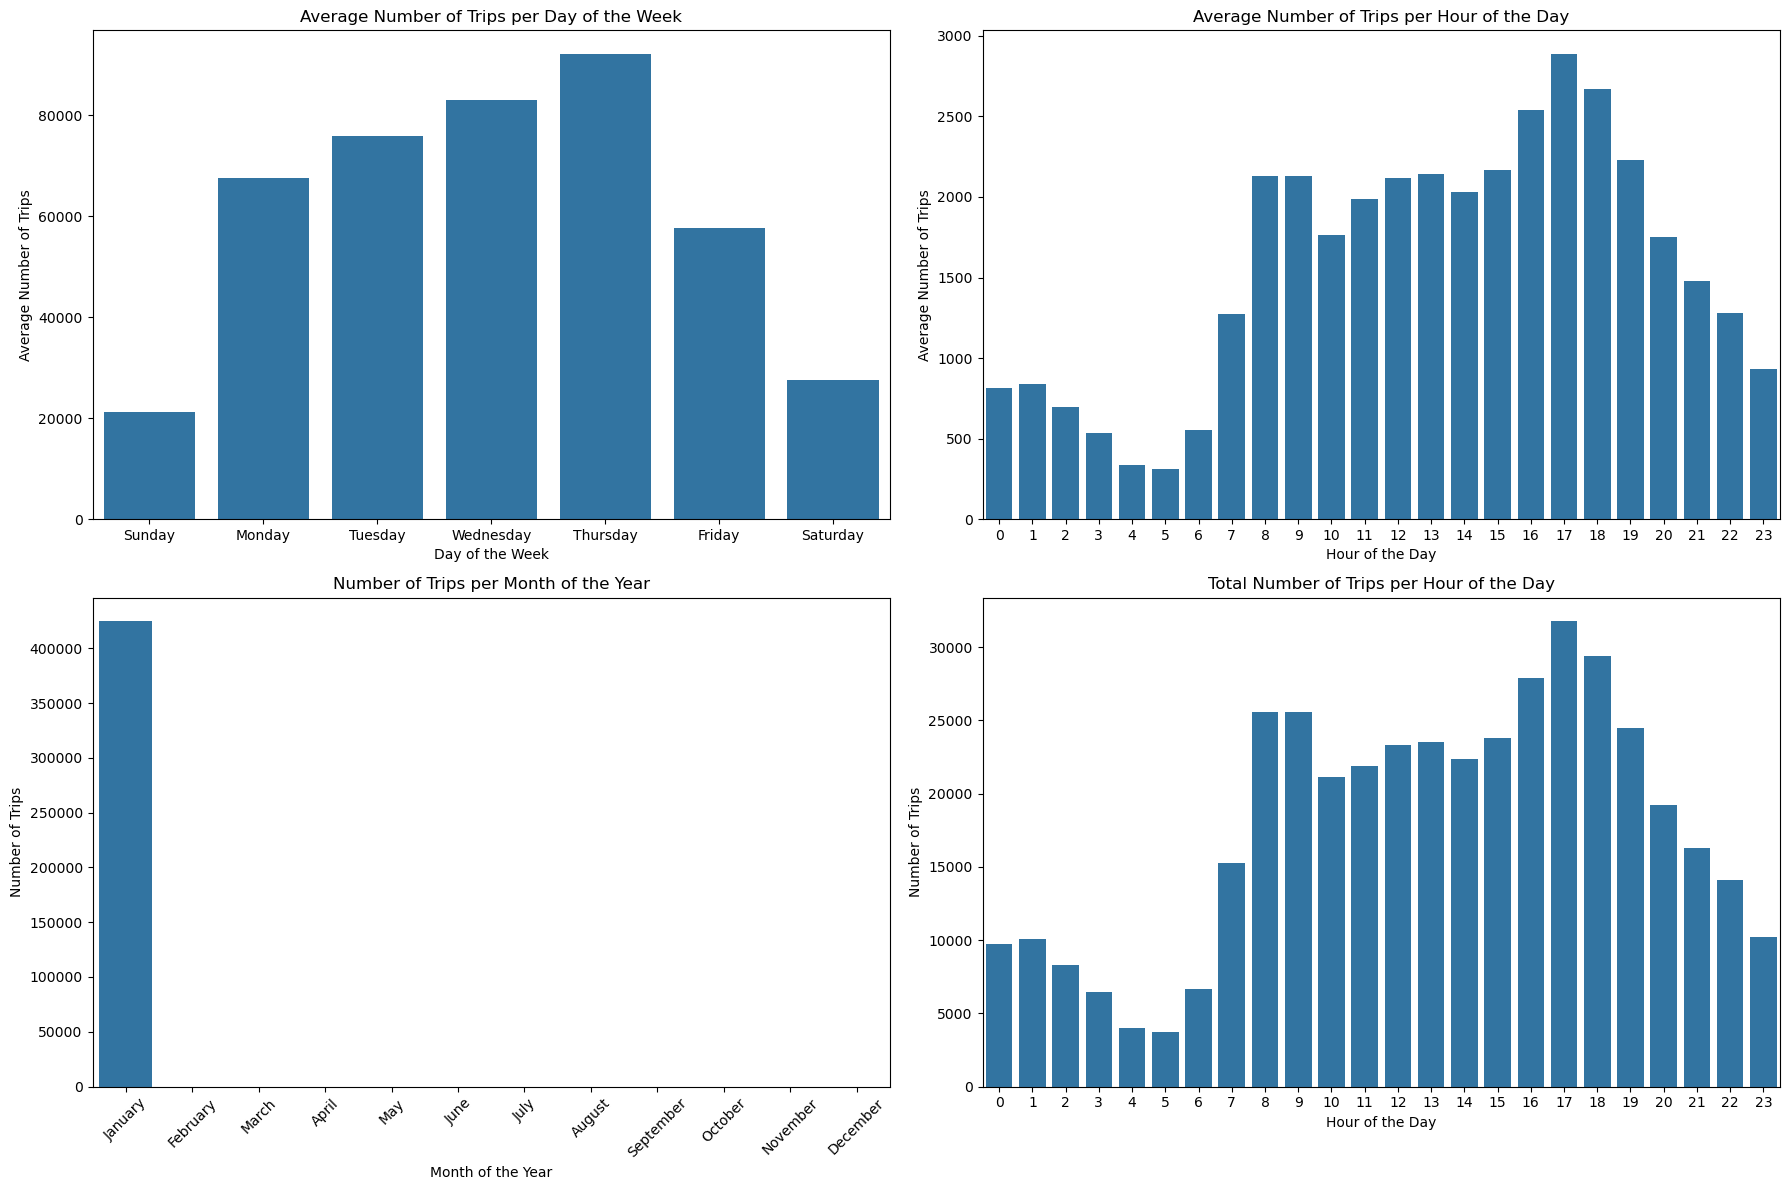

In [193]:
# Calculate the average number of trips per day of the week
avg_trips_per_day = chicago_taxi_df['day_name'].value_counts().sort_index()
avg_trips_per_day = avg_trips_per_day.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Group by date and hour, then count the number of trips
daily_hourly_trips = chicago_taxi_df.groupby(['date', 'hour']).size().reset_index(name='trip_count')

# Calculate the average number of trips per hour
avg_hourly_trips = daily_hourly_trips.groupby('hour')['trip_count'].mean()

# Count the number of trips per month
trips_per_month = chicago_taxi_df['month_name'].value_counts().sort_index()
trips_per_month = trips_per_month.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot the average number of trips per day of the week
sns.barplot(x=avg_trips_per_day.index, y=avg_trips_per_day.values, ax=axes[0, 0])
axes[0, 0].set_xlabel('Day of the Week')
axes[0, 0].set_ylabel('Average Number of Trips')
axes[0, 0].set_title('Average Number of Trips per Day of the Week')

# Plot the average number of trips per hour of the day
sns.barplot(x=avg_hourly_trips.index, y=avg_hourly_trips.values, ax=axes[0, 1])
axes[0, 1].set_xlabel('Hour of the Day')
axes[0, 1].set_ylabel('Average Number of Trips')
axes[0, 1].set_title('Average Number of Trips per Hour of the Day')
axes[0, 1].set_xticks(range(0, 24))

# Plot the number of trips per month
sns.barplot(x=trips_per_month.index, y=trips_per_month.values, ax=axes[1, 0])
axes[1, 0].set_xlabel('Month of the Year')
axes[1, 0].set_ylabel('Number of Trips')
axes[1, 0].set_title('Number of Trips per Month of the Year')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Plot the total number of trips per hour of the day
hourly_trips = chicago_taxi_df.groupby('hour').size()
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, ax=axes[1, 1])
axes[1, 1].set_xlabel('Hour of the Day')
axes[1, 1].set_ylabel('Number of Trips')
axes[1, 1].set_title('Total Number of Trips per Hour of the Day')
axes[1, 1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

# Chicago Community Areas/Census Tracts

## Map of Chicago Community Areas

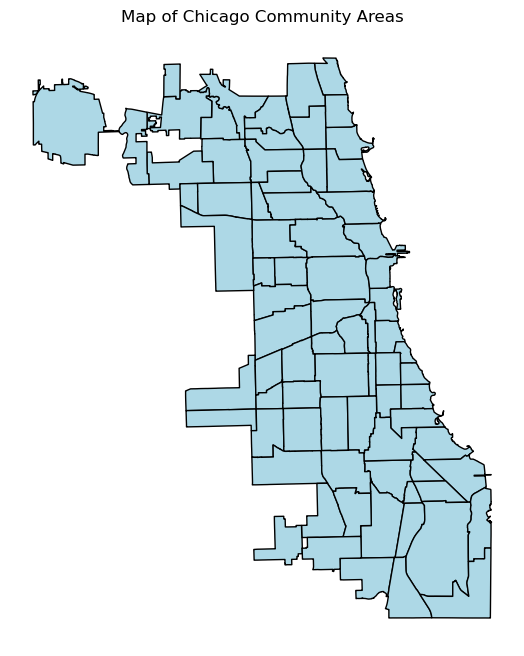

In [197]:
# Load the GeoJSON file
chicago_community_areas = gpd.read_file('../data/Boundaries - Community Areas (current).geojson')

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
chicago_community_areas.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title('Map of Chicago Community Areas')

# Remove the axis
ax.axis('off')

plt.show()

## Map of Chicago Census Tracts

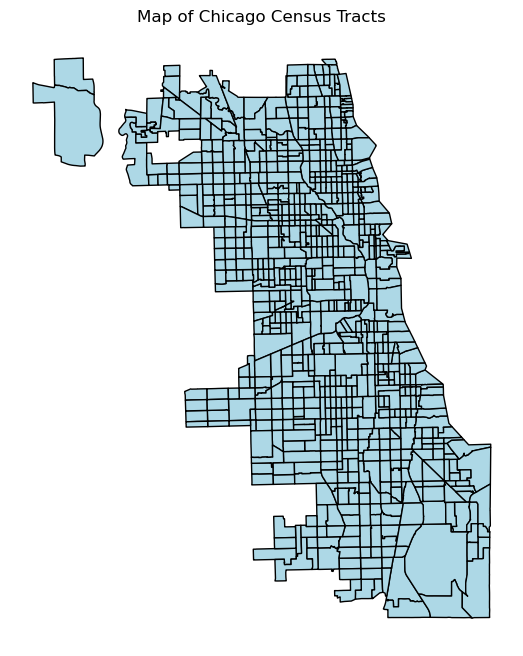

In [202]:
# Load the GeoJSON file
chicago_census_tracts = gpd.read_file('../data/Boundaries - Census Tracts - 2010.geojson')

# Plot the map
fig, ax = plt.subplots(figsize=(8, 8))
chicago_census_tracts.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title('Map of Chicago Census Tracts')

# Remove the axis
ax.axis('off')

plt.show()

## Map of Chicago Community Areas with Labels

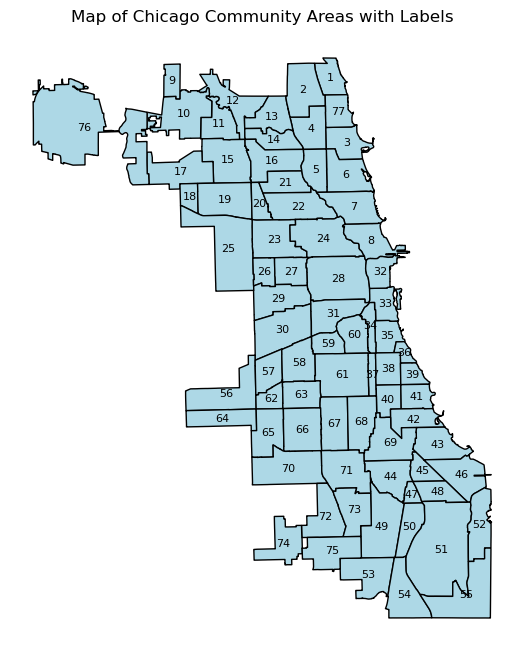

In [205]:
fig, ax = plt.subplots(figsize=(8, 8))
chicago_community_areas.plot(ax=ax, color='lightblue', edgecolor='black')

# Add labels
for idx, row in chicago_community_areas.iterrows():
    plt.annotate(text=row['area_numbe'],  # Replace with the actual column name
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 ha='center', va='center', fontsize=8, color='black')

plt.title('Map of Chicago Community Areas with Labels')

# Remove the axis
ax.axis('off')

plt.show()

## Choropleth Map of Taxi Pickups in Chicago Community Areas

In [211]:
# Step 1: Use value_counts() on the 'pickup_community_area' column
value_counts = chicago_taxi_df['pickup_community_area'].value_counts()

# Step 2: Convert the result to a DataFrame
pickup_df = value_counts.to_frame()

# Step 3: Reset the index to get a clean DataFrame with proper columns
pickup_df.reset_index(inplace=True)

# Step 4: Rename the columns for clarity
pickup_df.columns = ['pickup_community_area', 'trips']

# Step 5: Sort the DataFrame by the 'pickup_community_area' column
pickup_df = pickup_df.sort_values(by='pickup_community_area')

# Step 6: Reset the index of the sorted DataFrame
pickup_df.reset_index(drop=True, inplace=True)

# Now, value_counts_df is the new DataFrame with the count of observations per community area
pickup_df

,pickup_community_area,trips
0,1,2033
1,2,1900
2,3,5695
3,4,1996
4,5,1384
...,...,...
72,73,51
73,74,7
74,75,34
75,76,26191


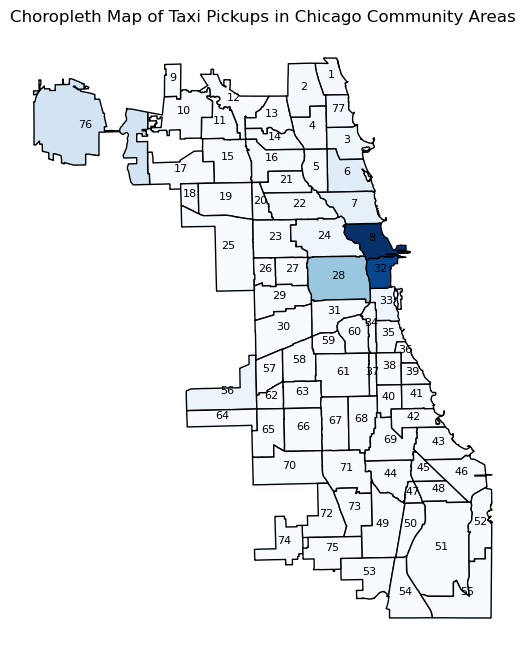

In [217]:
# Load the GeoJSON file
chicago_community_areas_gdf = gpd.read_file('../data/Boundaries - Community Areas (current).geojson')  # Update with your file path
chicago_community_areas_gdf['area_numbe'] = chicago_community_areas_gdf['area_numbe'].astype(int)

# Merge GeoDataFrame with the taxi trip data
chicago_community_areas_gdf = chicago_community_areas_gdf.merge(pickup_df, left_on='area_numbe', right_on='pickup_community_area')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
chicago_community_areas_gdf.plot(column='trips', ax=ax, legend=False,
         legend_kwds={'label': "Number of Taxi Trips by Community Area",
                      'orientation': "vertical"},
         cmap='Blues',  # Color map for the choropleth
         edgecolor='black')  # Optional: Add borders to the community areas

# Add community area numbers to the map
for idx, row in chicago_community_areas_gdf.iterrows():
    plt.annotate(text=row['area_numbe'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Remove the axis
ax.axis('off')

# Add title
plt.title('Choropleth Map of Taxi Pickups in Chicago Community Areas')
plt.show()

## Choropleth Map of Taxi Dropoffs in Chicago Community Areas

In [220]:
# Step 1: Use value_counts() on the 'pickup_community_area' column

# Step 2: Convert the result to a DataFrame
dropoff_df = chicago_taxi_df['dropoff_community_area'].value_counts().to_frame()

# Step 3: Reset the index to get a clean DataFrame with proper columns
dropoff_df.reset_index(inplace=True)

# Step 4: Rename the columns for clarity
dropoff_df.columns = ['dropoff_community_area', 'trips']

# Step 5: Sort the DataFrame by the 'pickup_community_area' column
dropoff_df = dropoff_df.sort_values(by='dropoff_community_area')

# Step 6: Reset the index of the sorted DataFrame
dropoff_df.reset_index(drop=True, inplace=True)

# Now, value_counts_df is the new DataFrame with the count of observations per community area
dropoff_df

,dropoff_community_area,trips
0,1,2620
1,2,2403
2,3,7219
3,4,3056
4,5,3423
...,...,...
72,73,72
73,74,35
74,75,77
75,76,11566


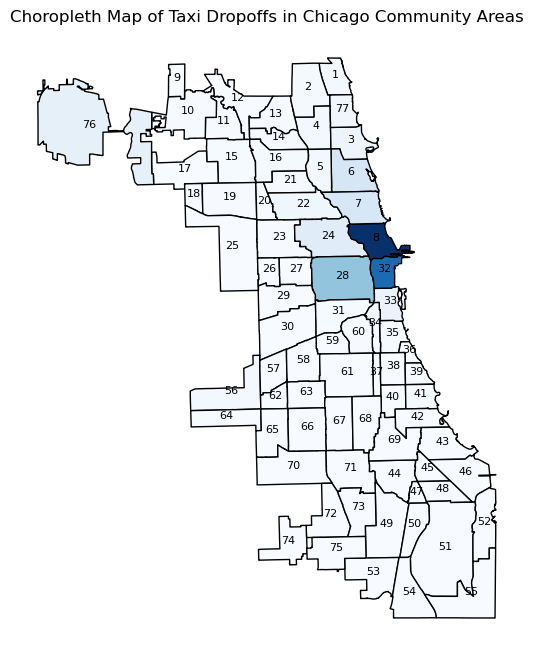

In [222]:
# Load the GeoJSON file
chicago_map_gdf = gpd.read_file('../data/Boundaries - Community Areas (current).geojson')  # Update with your file path
chicago_map_gdf['area_numbe'] = chicago_map_gdf['area_numbe'].astype(int)

# Merge GeoDataFrame with the taxi trip data
chicago_map_gdf = chicago_map_gdf.merge(dropoff_df, left_on='area_numbe', right_on='dropoff_community_area')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
chicago_map_gdf.plot(column='trips', ax=ax, legend=False,
         legend_kwds={'label': "Number of Taxi Trips by Community Area",
                      'orientation': "vertical"},
         cmap='Blues',  # Color map for the choropleth
         edgecolor='black')  # Optional: Add borders to the community areas

# Add community area numbers to the map
for idx, row in chicago_map_gdf.iterrows():
    plt.annotate(text=row['area_numbe'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Remove the axis
ax.axis('off')

# Add title
plt.title('Choropleth Map of Taxi Dropoffs in Chicago Community Areas')
plt.show()